## **Pre Processing**

In [ ]:
import pandas as pd

In [ ]:
import os
os.getcwd()
os.chdir("I:/My Drive")
os.getcwd()

'I:\\My Drive'

In [ ]:
test = pd.read_csv("Data files/Special data files/test.csv")
train = pd.read_csv("Data files/Special data files/train.csv")

In [ ]:
from catboost import CatBoostClassifier

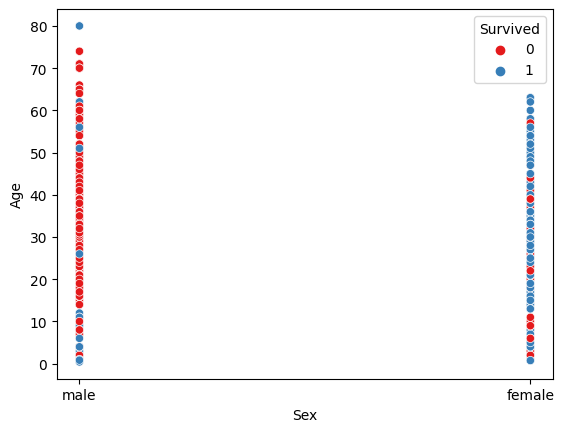

In [ ]:
# make a chart between gender, age and survived
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = train, x = "Sex",y="Age", hue = "Survived", palette = "Set1")
plt.show()

In [ ]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
# train.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['blue', 'orange'], title='Survival Rate by Gender')
# plt.ylabel('Survival Rate')
# plt.show()


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
target = train["Survived"]
train = train.drop(columns = "Survived")

In [ ]:
data = pd.concat([train,test])
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data = data.drop(columns="Name")
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data["Family"] = data["Parch"]+data["SibSp"]
data = data.drop(columns=["SibSp","Parch"])
data

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,3,male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,female,35.0,113803,53.1000,C123,S,1
4,5,3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,A.5. 3236,8.0500,NaN,S,0
414,1306,1,female,39.0,PC 17758,108.9000,C105,C,0
415,1307,3,male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,male,NaN,359309,8.0500,NaN,S,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   Ticket       1309 non-null   object 
 5   Fare         1308 non-null   float64
 6   Cabin        295 non-null    object 
 7   Embarked     1307 non-null   object 
 8   Family       1309 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


In [ ]:
# impute age,fare has only one missing,embarked has 2 missing,drop cabin,encode object columns
data = data.drop(columns='Cabin')
data["Ticket"].nunique()

929

In [ ]:
(data.select_dtypes(include='object').columns.tolist())

['Sex', 'Ticket', 'Embarked']

In [ ]:
obj_cols = data.select_dtypes(include='object').columns.tolist()
for i in range(len(obj_cols)):
  print(f"Column: {obj_cols[i]}, nunique: {data[obj_cols[i]].nunique()}")

Column: Sex, nunique: 2
Column: Ticket, nunique: 929
Column: Embarked, nunique: 3


In [ ]:
data["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
# impute age,fare has only one missing,embarked has 2 missing,encode object columns
# encode ticket,embarked and then impute these,then impute
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data["Sex"] = encoder.fit_transform(data[["Sex"]])
data["Ticket"] = encoder.fit_transform(data[["Ticket"]])
data["Embarked"] = encoder.fit_transform(data[["Embarked"]])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   float64
 3   Age          1046 non-null   float64
 4   Ticket       1309 non-null   float64
 5   Fare         1308 non-null   float64
 6   Embarked     1309 non-null   float64
 7   Family       1309 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 92.0 KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   float64
 3   Age          1046 non-null   float64
 4   Ticket       1309 non-null   float64
 5   Fare         1308 non-null   float64
 6   Embarked     1309 non-null   float64
 7   Family       1309 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 92.0 KB


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
data["Age"]=imputer.fit_transform(data[["Age"]])
data["Fare"]=imputer.fit_transform(data[["Fare"]])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   float64
 3   Age          1309 non-null   float64
 4   Ticket       1309 non-null   float64
 5   Fare         1309 non-null   float64
 6   Embarked     1309 non-null   float64
 7   Family       1309 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 92.0 KB


In [ ]:
data

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,Family
0,1,3,1.0,22.000000,720.0,7.2500,2.0,1
1,2,1,0.0,38.000000,816.0,71.2833,0.0,1
2,3,3,0.0,26.000000,914.0,7.9250,2.0,0
3,4,1,0.0,35.000000,65.0,53.1000,2.0,1
4,5,3,1.0,35.000000,649.0,8.0500,2.0,0
...,...,...,...,...,...,...,...,...
413,1305,3,1.0,29.881138,711.0,8.0500,2.0,0
414,1306,1,0.0,39.000000,834.0,108.9000,0.0,0
415,1307,3,1.0,38.500000,872.0,7.2500,2.0,0
416,1308,3,1.0,29.881138,579.0,8.0500,2.0,0


In [ ]:
x = data.iloc[:891].copy()
test = data.iloc[891:].copy()

In [ ]:
x

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,Family
0,1,3,1.0,22.000000,720.0,7.2500,2.0,1
1,2,1,0.0,38.000000,816.0,71.2833,0.0,1
2,3,3,0.0,26.000000,914.0,7.9250,2.0,0
3,4,1,0.0,35.000000,65.0,53.1000,2.0,1
4,5,3,1.0,35.000000,649.0,8.0500,2.0,0
...,...,...,...,...,...,...,...,...
886,887,2,1.0,27.000000,130.0,13.0000,2.0,0
887,888,1,0.0,19.000000,18.0,30.0000,2.0,0
888,889,3,0.0,29.881138,923.0,23.4500,2.0,3
889,890,1,1.0,26.000000,11.0,30.0000,0.0,0


In [ ]:
test_cols = test["PassengerId"]
x=x.drop(columns="PassengerId")
test=test.drop(columns="PassengerId")


In [ ]:
x

,Pclass,Sex,Age,Ticket,Fare,Embarked,Family
0,3,1.0,22.000000,720.0,7.2500,2.0,1
1,1,0.0,38.000000,816.0,71.2833,0.0,1
2,3,0.0,26.000000,914.0,7.9250,2.0,0
3,1,0.0,35.000000,65.0,53.1000,2.0,1
4,3,1.0,35.000000,649.0,8.0500,2.0,0
...,...,...,...,...,...,...,...
886,2,1.0,27.000000,130.0,13.0000,2.0,0
887,1,0.0,19.000000,18.0,30.0000,2.0,0
888,3,0.0,29.881138,923.0,23.4500,2.0,3
889,1,1.0,26.000000,11.0,30.0000,0.0,0


In [ ]:
cat = CatBoostClassifier()
cat.fit(x,target)

Learning rate set to 0.009807
0:	learn: 0.6857537	total: 147ms	remaining: 2m 26s
1:	learn: 0.6796316	total: 150ms	remaining: 1m 14s
2:	learn: 0.6735459	total: 152ms	remaining: 50.4s
3:	learn: 0.6677335	total: 154ms	remaining: 38.3s
4:	learn: 0.6620553	total: 156ms	remaining: 31.1s
5:	learn: 0.6563847	total: 158ms	remaining: 26.2s
6:	learn: 0.6512915	total: 160ms	remaining: 22.7s
7:	learn: 0.6457652	total: 162ms	remaining: 20.1s
8:	learn: 0.6398347	total: 165ms	remaining: 18.1s
9:	learn: 0.6343091	total: 167ms	remaining: 16.5s
10:	learn: 0.6302234	total: 169ms	remaining: 15.2s
11:	learn: 0.6244429	total: 172ms	remaining: 14.1s
12:	learn: 0.6189212	total: 174ms	remaining: 13.2s
13:	learn: 0.6141147	total: 176ms	remaining: 12.4s
14:	learn: 0.6104528	total: 177ms	remaining: 11.6s
15:	learn: 0.6051881	total: 180ms	remaining: 11s
16:	learn: 0.6008526	total: 182ms	remaining: 10.5s
17:	learn: 0.5963496	total: 184ms	remaining: 10.1s
18:	learn: 0.5920171	total: 187ms	remaining: 9.64s
19:	learn: 

In [ ]:
p = cat.predict(test)

In [ ]:
result = pd.DataFrame({"PassengerId":test_cols,"Survived":p.flatten()})
result.to_csv("Catboost untuned on processed data.csv",header=True,index=False)

In [ ]:
os.getcwd()

'I:\\My Drive'

## **TensorFlow: The Boss**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
x=x.to_numpy()
test=test.to_numpy()
target=target.to_numpy()

In [ ]:
from tensorflow.keras.layers import Normalization
scaler = Normalization()

In [ ]:
scaler.adapt(x)
x_scaled = scaler(x)
test_scaled = scaler(test)

In [ ]:
model = keras.Sequential([
    layers.Dense(units = 25, activation ='relu', name="Layer1"),
    layers.Dense(units = 10, activation ='relu', name="Layer2"),
    layers.Dense(units = 7, activation ='relu', name="Layer3"),
    layers.Dense(units = 1, activation ='sigmoid', name="Layer4")
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

model.fit(x_scaled,target,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6145 - loss: 0.6501 - val_accuracy: 0.6425 - val_loss: 0.5986
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6122 - loss: 0.6094 - val_accuracy: 0.6425 - val_loss: 0.5507
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6570 - loss: 0.5710 - val_accuracy: 0.7263 - val_loss: 0.5145
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.5454 - val_accuracy: 0.7877 - val_loss: 0.4970
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.5342 - val_accuracy: 0.8156 - val_loss: 0.4829
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7604 - loss: 0.5500 - val_accuracy: 0.8268 - val_loss: 0.4754
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8030 - loss: 0.5219 - val_accuracy: 0.8268 - val_loss: 0.4648
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8041 - loss: 0.5161 - val_accuracy: 0.8380 - val_loss

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 25)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Dense)                  │ (None, 7)              │            77 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer4 (Dense)                  │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,637 (6.40 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,092 (4.27 KB)

In [ ]:
y_probability = model.predict(test_scaled)
predict = (y_probability>=0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
predict.flatten()

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
result = pd.DataFrame({"PassengerId":test_cols,"Survived":predict.flatten()})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv("ReLU Neural.csv",header=True,index=False)
from google.colab import files
files.download("ReLU Neural.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Using Swish**

In [ ]:
model = keras.Sequential([
    layers.Dense(units = 25, activation =tf.nn.swish, name="Layer1"),
    layers.Dense(units = 10, activation =tf.nn.swish, name="Layer2"),
    layers.Dense(units = 7, activation =tf.nn.swish, name="Layer3"),
    layers.Dense(units = 1, activation ='sigmoid', name="Layer4")
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

model.fit(x_scaled,target,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5090 - loss: 0.6905 - val_accuracy: 0.7486 - val_loss: 0.6328
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7398 - loss: 0.6279 - val_accuracy: 0.7821 - val_loss: 0.5623
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7308 - loss: 0.5806 - val_accuracy: 0.8101 - val_loss: 0.4985
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7480 - loss: 0.5446 - val_accuracy: 0.8380 - val_loss: 0.4555
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7891 - loss: 0.4978 - val_accuracy: 0.8547 - val_loss: 0.4306
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7988 - loss: 0.4751 - val_accuracy: 0.8547 - val_loss: 0.4184
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8013 - loss: 0.4855 - val_accuracy: 0.8492 - val_loss: 0.4081
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7965 - loss: 0.4854 - val_accuracy: 0.8436 - val_loss

In [ ]:
y_probability = model.predict(test_scaled)
predict = (y_probability>=0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [ ]:
result = pd.DataFrame({"PassengerId":test_cols,"Survived":predict.flatten()})

In [ ]:
result.to_csv("ReLU Swish.csv",header=True,index=False)
from google.colab import files
files.download("ReLU Swish.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Custom Activation Functions**

In [ ]:
def arclog(x):
    return tf.where(
        x > 0, 10 * tf.math.log(x),
        tf.where(x < 0, tf.math.log(tf.abs(x)), tf.zeros_like(x))
    )

model = keras.Sequential([
    layers.Dense(units = 25, activation ='relu', name="Layer1"),
    layers.Dense(units = 10, activation ='relu', name="Layer2"),
    layers.Dense(units = 7, activation ='relu', name="Layer3"),
    layers.Dense(units = 1, activation ='sigmoid', name="Layer4")
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

In [ ]:
model.fit(x_scaled,target,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3302 - loss: 0.7369 - val_accuracy: 0.5922 - val_loss: 0.6883
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6001 - loss: 0.6771 - val_accuracy: 0.7318 - val_loss: 0.6410
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6996 - loss: 0.6389 - val_accuracy: 0.7598 - val_loss: 0.5971
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7183 - loss: 0.6008 - val_accuracy: 0.7877 - val_loss: 0.5545
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7568 - loss: 0.5702 - val_accuracy: 0.8380 - val_loss: 0.5168
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7558 - loss: 0.5544 - val_accuracy: 0.8380 - val_loss: 0.4786
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7761 - loss: 0.5239 - val_accuracy: 0.8324 - val_loss: 0.4442
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7602 - loss: 0.5065 - val_accuracy: 0.8436 - val_loss

In [ ]:
predict = (model.predict(test_scaled)>=0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
result = pd.DataFrame({"PassengerId":test_cols,"Survived":predict.flatten()})
result.to_csv("Re ReLU.csv",header=True,index=False)
from google.colab import files
files.download("Re ReLU.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>